In [1]:
import json
import geojson
from scipy import stats
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def fill_between_points(pointa, pointb,n):
    (xmin,ymin) = pointa;
    (xmax,ymax) = pointb;
    return [[xmin + i*(xmax-xmin)/n,ymin + i*(ymax-ymin)/n] for i in range(n)] + [[xmax,ymax]]

In [5]:
#load data

with open('cali.geojson') as f:
    data = json.load(f)
    
allcoords = []
#to work with multilinestring - FBP foreach line, then normally

for feature in data['features']:
    if feature['geometry']['type'] == "MultiLineString":
        for i in range(len(feature['geometry']['coordinates'][0])-1):
            allcoords.extend(fill_between_points(feature['geometry']['coordinates'][0][i],feature['geometry']['coordinates'][0][i+1],500))
len(allcoords)

12631212

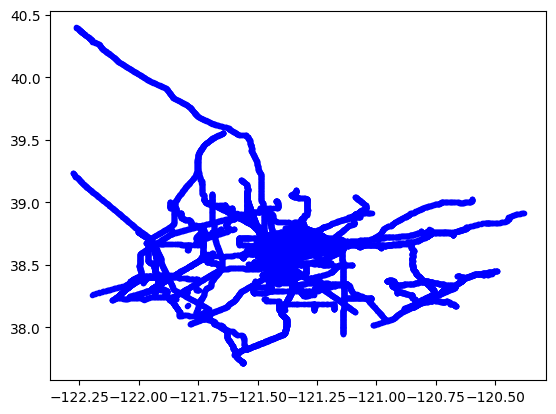

In [5]:
longs = [x[0] for x in allcoords]
latis = [x[1] for x in allcoords]

plt.plot(longs,latis,'b.')
plt.show()

In [6]:
#check if a point is in a rectangle from bottom left point (x,y) with length l

#point: (a,b)
def point_in_box(point,box):
    (a,b) = point
    (x,y,l) = box
    if (a>x) & (a<(x+l)) & (b>y) & (b<(y+l)):
        return True
    else:
        return False
    
def generate_grid(bounds,l):
    points=[]
    
    (xrange,yrange) = bounds
    (xmin,xmax) = xrange
    (ymin,ymax) = yrange
    
    nx = (xmax-xmin)/l;
    ny = (ymax-ymin)/l;
    
    xlocs = np.linspace(xmin,xmax-l,math.ceil(nx));
    ylocs = np.linspace(ymin,ymax-l,math.ceil(ny));
    
    for x in range(len(xlocs)):
        for y in range(len(ylocs)):
            points.append((xlocs[x],ylocs[y],l))
            
    return points

def generate_bin_edges(bounds,l):
    
    (xrange,yrange) = bounds
    (xmin,xmax) = xrange
    (ymin,ymax) = yrange
    
    nx = (xmax-xmin)/l;
    ny = (ymax-ymin)/l;
    
    xlocs = np.linspace(xmin,xmax-l,math.ceil(nx));
    ylocs = np.linspace(ymin,ymax-l,math.ceil(ny));
            
    return (xlocs,ylocs)


#create grid and check each point in the grid:
def grid_count(datapoints,boxpoints):
    N=0;
    for box in boxpoints:
        
        for data in datapoints:
            if point_in_box(data,box):
                N += 1;
                break;
    return N

def get_count(allcoords,l):
    longs = [x[0] for x in allcoords]
    lats  = [x[1] for x in allcoords]
    
    boundlong = (min(longs), max(longs))
    boundlat = (min(lats), max(lats))
    
    grid, _, _ = np.histogram2d(longs, lats,bins=generate_bin_edges((boundlong,boundlat),l))
    return np.count_nonzero(grid)

def get_dimension(scale,counts):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(scale),np.log(counts))

    dimension = -slope
    print(dimension)

In [7]:
ls = np.logspace(-2,-5,20)
counts = [0]*len(ls)

for i in range(len(ls)):
    counts[i] = get_count(allcoords,ls[i])
    print(counts[i]) 

3540
5199
7450
10204
13057
15618
17781
19658
21084
22111
22941
23506
23901
24186
24379
24449


: 

In [ ]:
plt.loglog(ls,counts,'bx')
plt.grid("True")
plt.show()

In [ ]:
get_dimension(ls,counts)

In [ ]:
# for i in data['features']:
#     cord = i['geometry']['coordinates']
#     for j in cord:
#         for k in j:
#             lons.append(k[0])
#             lats.append(k[1])
#             allcoords.append(k)